In [8]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('C:/Users/suvad/Downloads/datasets_805842_1381162_DataScience_jobs.csv')

In [5]:
df.head()

Unnamed: 0                                              roles  \
0           0                 Data Scientist/ Academic Counselor   
1           1                                     Data Scientist   
2           2                              Senior Data Scientist   
3           3  Data Scientist - Machine Learning & Statistica...   
4           4                                     Data Scientist   

                                         companies           locations  \
0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED  Chennai, Bengaluru   
1              Shell India Markets Private Limited             Chennai   
2                                   Decision Point             Gurgaon   
3                           Talent Stock Solutions               Delhi   
4               Zen3Tech (A Tech Mahindra Company)           Hyderabad   

  experience                                             skills  
0    2-7 Yrs  Data Science\nArtificial Intelligence\ntrainin...  
1    5-7 Yrs  Data Science\nMultivariate Analysis\nFactor An...  
2    3-5 Yrs  Azure\ntimeseries forecasting\nMachine Learnin...  
3    2-5 Yrs  Data Science\nR\nC\nData Scientist\nStatistica...  
4    3-8 Yrs  R\nA/B Testing\nData Manipulation\nMachine Lea...

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1282 non-null   int64 
 1   roles       1282 non-null   object
 2   companies   1282 non-null   object
 3   locations   1282 non-null   object
 4   experience  1282 non-null   object
 5   skills      1279 non-null   object
dtypes: int64(1), object(5)
memory usage: 60.2+ KB


In [13]:
df = df[~df['skills'].isnull()]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1279 entries, 0 to 1281
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1279 non-null   int64 
 1   roles       1279 non-null   object
 2   companies   1279 non-null   object
 3   locations   1279 non-null   object
 4   experience  1279 non-null   object
 5   skills      1279 non-null   object
dtypes: int64(1), object(5)
memory usage: 69.9+ KB


In [10]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [18]:
df1 = explode(df.assign(var1=df.skills.str.split('\n')), 'var1')

In [19]:
df1

Unnamed: 0                                        companies experience  \
0              0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED    2-7 Yrs   
1              0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED    2-7 Yrs   
2              0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED    2-7 Yrs   
3              0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED    2-7 Yrs   
4              0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED    2-7 Yrs   
...          ...                                              ...        ...   
9224        1281                      Diverse Lynx India Pvt. Ltd    2-6 Yrs   
9225        1281                      Diverse Lynx India Pvt. Ltd    2-6 Yrs   
9226        1281                      Diverse Lynx India Pvt. Ltd    2-6 Yrs   
9227        1281                      Diverse Lynx India Pvt. Ltd    2-6 Yrs   
9228        1281                      Diverse Lynx India Pvt. Ltd    2-6 Yrs   

               locations                               roles  \
0     Chennai, Bengaluru  Data Scientist/ Academic Counselor   
1     Chennai, Bengaluru  Data Scientist/ Academic Counselor   
2     Chennai, Bengaluru  Data Scientist/ Academic Counselor   
3     Chennai, Bengaluru  Data Scientist/ Academic Counselor   
4     Chennai, Bengaluru  Data Scientist/ Academic Counselor   
...                  ...                                 ...   
9224           Bengaluru                    Python Developer   
9225           Bengaluru                    Python Developer   
9226           Bengaluru                    Python Developer   
9227           Bengaluru                    Python Developer   
9228           Bengaluru                    Python Developer   

                                                 skills  \
0     Data Science\nArtificial Intelligence\ntrainin...   
1     Data Science\nArtificial Intelligence\ntrainin...   
2     Data Science\nArtificial Intelligence\ntrainin...   
3     Data Science\nArtificial Intelligence\ntrainin...   
4     Data Science\nArtificial Intelligence\ntrainin...   
...                                                 ...   
9224  Web services\nspark\nR Programming\nDatabase\n...   
9225  Web services\nspark\nR Programming\nDatabase\n...   
9226  Web services\nspark\nR Programming\nDatabase\n...   
9227  Web services\nspark\nR Programming\nDatabase\n...   
9228  Web services\nspark\nR Programming\nDatabase\n...   

                         var1  
0                Data Science  
1     Artificial Intelligence  
2                    training  
3                     Tableau  
4            Machine Learning  
...                       ...  
9224                 Database  
9225              Programming  
9226          Data processing  
9227             Data quality  
9228                Analytics  

[9229 rows x 7 columns]

In [37]:
df1['var1'] = df1['var1'].str.title() 

In [38]:
dfx = pd.DataFrame(df1.var1.apply(pd.Series).stack().value_counts()).reset_index()

In [39]:
dfx.head(10)

index    0
0         Machine Learning  688
1             Data Science  412
2                   Python  290
3              Data Mining  266
4                Analytics  197
5  Artificial Intelligence  192
6                        R  184
7           Data Scientist  181
8         Computer Science  173
9            Data Analysis  155

In [41]:
dfx.to_csv('C:/Users/suvad/Downloads/dfx.csv')

In [42]:
#Added categories the records with frequency count of 5 or above
dfx = pd.read_csv('C:/Users/suvad/Downloads/dfx.csv')

In [43]:
dfx

index  count                     rename  \
0              Machine Learning    688           Machine Learning   
1                  Data Science    412               Data Science   
2                        Python    290                     Python   
3                   Data Mining    266                Data Mining   
4                     Analytics    197                  Analytics   
...                         ...    ...                        ...   
1071            Tensor Flow Nlp      1            Tensor Flow Nlp   
1072     Educational Specialist      1     Educational Specialist   
1073         System Integration      1         System Integration   
1074             Tensorflow Gpu      1             Tensorflow Gpu   
1075  Data Scientist / Engineer      1  Data Scientist / Engineer   

                     Category  
0                     Generic  
1                     Generic  
2     DS Programming Language  
3                     Generic  
4                     Generic  
...                       ...  
1071                      NaN  
1072                      NaN  
1073                      NaN  
1074                      NaN  
1075                      NaN  

[1076 rows x 4 columns]

In [44]:
dfx = dfx[~dfx['Category'].isnull()]

In [45]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     252 non-null    object
 1   count     252 non-null    int64 
 2   rename    252 non-null    object
 3   Category  252 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [68]:
df2 = pd.merge(df1,
                 dfx[['index', 'rename','Category']],
                 left_on='var1', right_on='index', how='inner')

In [69]:
df2

Unnamed: 0                                        companies experience  \
0              0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED    2-7 Yrs   
1              1              Shell India Markets Private Limited    5-7 Yrs   
2              2                                   Decision Point    3-5 Yrs   
3              3                           Talent Stock Solutions    2-5 Yrs   
4             10      Orcapod Consulting Services Private Limited    6-9 Yrs   
...          ...                                              ...        ...   
7848        1171                                     e3consultant    2-7 Yrs   
7849        1213                                     e3consultant    2-7 Yrs   
7850        1224                                     e3consultant    2-7 Yrs   
7851        1261                      Diverse Lynx India Pvt. Ltd    2-6 Yrs   
7852        1281                      Diverse Lynx India Pvt. Ltd    2-6 Yrs   

               locations                                              roles  \
0     Chennai, Bengaluru                 Data Scientist/ Academic Counselor   
1                Chennai                                     Data Scientist   
2                Gurgaon                              Senior Data Scientist   
3                  Delhi  Data Scientist - Machine Learning & Statistica...   
4              Bengaluru                                 Sr. Data Scientist   
...                  ...                                                ...   
7848             Chennai  Python Developer - Deep Learning/Machine Learning   
7849             Chennai  Python Developer - Deep Learning/Machine Learning   
7850             Chennai  Python Developer - Deep Learning/Machine Learning   
7851           Bengaluru                                   Python Developer   
7852           Bengaluru                                   Python Developer   

                                                 skills          var1  \
0     Data Science\nArtificial Intelligence\ntrainin...  Data Science   
1     Data Science\nMultivariate Analysis\nFactor An...  Data Science   
2     Azure\ntimeseries forecasting\nMachine Learnin...  Data Science   
3     Data Science\nR\nC\nData Scientist\nStatistica...  Data Science   
4     Data Science\nStatistical Modeling\nPython\nR\...  Data Science   
...                                                 ...           ...   
7848  Data Science\nAnalytical Skills\nArtificial In...  Web Services   
7849  Data Science\nAnalytical Skills\nArtificial In...  Web Services   
7850  Data Science\nAnalytical Skills\nArtificial In...  Web Services   
7851  Web services\nspark\nR Programming\nDatabase\n...  Web Services   
7852  Web services\nspark\nR Programming\nDatabase\n...  Web Services   

             index        rename          Category  
0     Data Science  Data Science           Generic  
1     Data Science  Data Science           Generic  
2     Data Science  Data Science           Generic  
3     Data Science  Data Science           Generic  
4     Data Science  Data Science           Generic  
...            ...           ...               ...  
7848  Web Services  Web Services  Data Engineering  
7849  Web Services  Web Services  Data Engineering  
7850  Web Services  Web Services  Data Engineering  
7851  Web Services  Web Services  Data Engineering  
7852  Web Services  Web Services  Data Engineering  

[7853 rows x 10 columns]

In [70]:
df2['experience'] = df2['experience'].apply(lambda x: x.split(' ')[0])

In [71]:
df2['experience_min'] = df2['experience'].apply(lambda x: x.split('-')[0]).astype(int)
df2['experience_max'] = df2['experience'].apply(lambda x: x.split('-')[1]).astype(int)

In [72]:
df2['repeat'] = (df2['experience_max'] - df2['experience_min']) + 1

In [73]:
df2

Unnamed: 0                                        companies experience  \
0              0  GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED        2-7   
1              1              Shell India Markets Private Limited        5-7   
2              2                                   Decision Point        3-5   
3              3                           Talent Stock Solutions        2-5   
4             10      Orcapod Consulting Services Private Limited        6-9   
...          ...                                              ...        ...   
7848        1171                                     e3consultant        2-7   
7849        1213                                     e3consultant        2-7   
7850        1224                                     e3consultant        2-7   
7851        1261                      Diverse Lynx India Pvt. Ltd        2-6   
7852        1281                      Diverse Lynx India Pvt. Ltd        2-6   

               locations                                              roles  \
0     Chennai, Bengaluru                 Data Scientist/ Academic Counselor   
1                Chennai                                     Data Scientist   
2                Gurgaon                              Senior Data Scientist   
3                  Delhi  Data Scientist - Machine Learning & Statistica...   
4              Bengaluru                                 Sr. Data Scientist   
...                  ...                                                ...   
7848             Chennai  Python Developer - Deep Learning/Machine Learning   
7849             Chennai  Python Developer - Deep Learning/Machine Learning   
7850             Chennai  Python Developer - Deep Learning/Machine Learning   
7851           Bengaluru                                   Python Developer   
7852           Bengaluru                                   Python Developer   

                                                 skills          var1  \
0     Data Science\nArtificial Intelligence\ntrainin...  Data Science   
1     Data Science\nMultivariate Analysis\nFactor An...  Data Science   
2     Azure\ntimeseries forecasting\nMachine Learnin...  Data Science   
3     Data Science\nR\nC\nData Scientist\nStatistica...  Data Science   
4     Data Science\nStatistical Modeling\nPython\nR\...  Data Science   
...                                                 ...           ...   
7848  Data Science\nAnalytical Skills\nArtificial In...  Web Services   
7849  Data Science\nAnalytical Skills\nArtificial In...  Web Services   
7850  Data Science\nAnalytical Skills\nArtificial In...  Web Services   
7851  Web services\nspark\nR Programming\nDatabase\n...  Web Services   
7852  Web services\nspark\nR Programming\nDatabase\n...  Web Services   

             index        rename          Category  experience_min  \
0     Data Science  Data Science           Generic               2   
1     Data Science  Data Science           Generic               5   
2     Data Science  Data Science           Generic               3   
3     Data Science  Data Science           Generic               2   
4     Data Science  Data Science           Generic               6   
...            ...           ...               ...             ...   
7848  Web Services  Web Services  Data Engineering               2   
7849  Web Services  Web Services  Data Engineering               2   
7850  Web Services  Web Services  Data Engineering               2   
7851  Web Services  Web Services  Data Engineering               2   
7852  Web Services  Web Services  Data Engineering               2   

      experience_max  repeat  
0                  7       6  
1                  7       3  
2                  5       3  
3                  5       4  
4                  9       4  
...              ...     ...  
7848               7       6  
7849               7       6  
7850               7       6  
7851               6       5  
7852               6       5  

[7853

In [74]:
df2 = df2[['Category', 'experience_min', 'experience_max', 'rename', 'repeat']]

In [79]:
df3 = df2.reindex(df2.index.repeat(df2.repeat))

In [80]:
df3

Category  experience_min  experience_max        rename  repeat
0              Generic               2               7  Data Science       6
0              Generic               2               7  Data Science       6
0              Generic               2               7  Data Science       6
0              Generic               2               7  Data Science       6
0              Generic               2               7  Data Science       6
...                ...             ...             ...           ...     ...
7852  Data Engineering               2               6  Web Services       5
7852  Data Engineering               2               6  Web Services       5
7852  Data Engineering               2               6  Web Services       5
7852  Data Engineering               2               6  Web Services       5
7852  Data Engineering               2               6  Web Services       5

[37855 rows x 5 columns]

In [81]:
df3['counter'] = df3.groupby(df3.index)['repeat'].cumcount()

In [84]:
df3['exp_year'] = df3['experience_min'] + df3['counter']

In [87]:
df3.head(12)

Category  experience_min  experience_max        rename  repeat  counter  \
0  Generic               2               7  Data Science       6        0   
0  Generic               2               7  Data Science       6        1   
0  Generic               2               7  Data Science       6        2   
0  Generic               2               7  Data Science       6        3   
0  Generic               2               7  Data Science       6        4   
0  Generic               2               7  Data Science       6        5   
1  Generic               5               7  Data Science       3        0   
1  Generic               5               7  Data Science       3        1   
1  Generic               5               7  Data Science       3        2   
2  Generic               3               5  Data Science       3        0   
2  Generic               3               5  Data Science       3        1   
2  Generic               3               5  Data Science       3        2   

   exp_year  
0         2  
0         3  
0         4  
0         5  
0         6  
0         7  
1         5  
1         6  
1         7  
2         3  
2         4  
2         5

In [116]:
import seaborn as sns

In [117]:
df4 = df3[df3['exp_year'] <= 10]

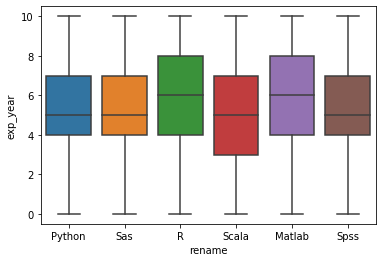

In [118]:
ax = sns.boxplot(x="rename", y="exp_year", data=df4[df4['Category'] == "DS Programming Language"])

In [91]:
pd.DataFrame(df3.Category.apply(pd.Series).stack().value_counts()).reset_index()

index      0
0                                Generic  12535
1                         Specialization   4917
2                DS Programming Language   3639
3                 Data Science sub areas   3249
4      Allied Programming Language/Tools   1974
5                              Education   1489
6   Data Query, Structure and Management   1445
7                                  Other   1318
8                        Ways of working   1012
9                    Big data Technology    697
10                       BI & Automation    616
11                              Platform    591
12                            Soft Skill    570
13   Deep Learning Framework and Methods    564
14                      Data Engineering    553
15                  SQL tools and server    494
16                         Visualization    473
17                             DS Domain    403
18                                Domain    365
19                               Library    274
20                       Business Skills    185
21                                 Cloud    175
22                             Reporting    170
23                      Deployment Tools    147

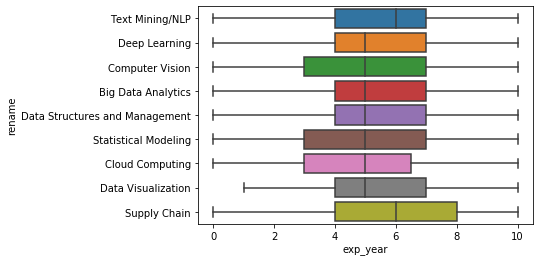

In [123]:
#ax = sns.boxplot(x="rename", y="exp_year", data=df3[df3['Category'] == "Ways of working"])
ax = sns.boxplot(x="exp_year", y="rename", data=df4[df4['Category'] == "Specialization"])

In [124]:
!pip install joypy

In [128]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import joypy

In [135]:
df3 = df3[['Category', 'rename', 'exp_year']]

In [136]:
df3

Category        rename  exp_year
0              Generic  Data Science         2
0              Generic  Data Science         3
0              Generic  Data Science         4
0              Generic  Data Science         5
0              Generic  Data Science         6
...                ...           ...       ...
7852  Data Engineering  Web Services         2
7852  Data Engineering  Web Services         3
7852  Data Engineering  Web Services         4
7852  Data Engineering  Web Services         5
7852  Data Engineering  Web Services         6

[37855 rows x 3 columns]

In [153]:
df5 = df3.groupby( ['Category','rename','exp_year'] ).size().to_frame(name = 'count').reset_index()

In [155]:
df5

Category          rename  exp_year  count
0     Allied Programming Language/Tools               C         0      1
1     Allied Programming Language/Tools               C         1      4
2     Allied Programming Language/Tools               C         2      9
3     Allied Programming Language/Tools               C         3     11
4     Allied Programming Language/Tools               C         4     12
...                                 ...             ...       ...    ...
3080                    Ways of working  Work From Home        13      2
3081                    Ways of working  Work From Home        14      2
3082                    Ways of working  Work From Home        15      2
3083                    Ways of working  Work From Home        16      1
3084                    Ways of working  Work From Home        17      1

[3085 rows x 4 columns]

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1280x800 with 0 Axes>

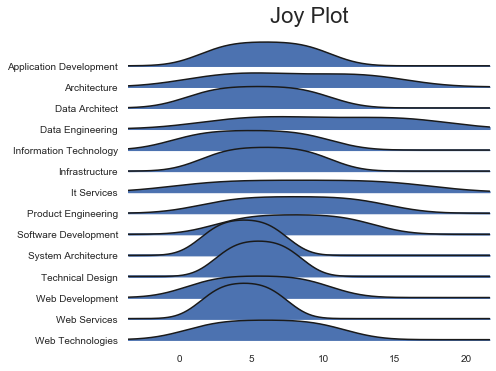

In [187]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df5[df5['Category'] == "Data Engineering"], column=['exp_year'],
                          by="rename", ylim='max', overlap = 0.5, figsize=(7,5))

# Decoration
plt.title('Joy Plot', fontsize=22)
plt.show

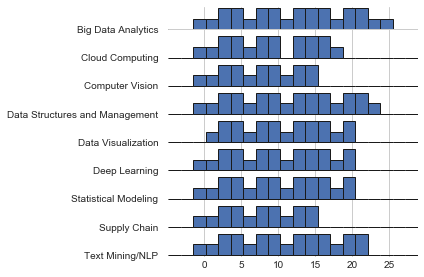

In [188]:
%matplotlib inline
fig, axes = joypy.joyplot(df5[df5['Category'] == "Specialization"], by="rename", column="exp_year",
                          hist="True", bins=20, overlap=0,
                          grid=True, legend=False)

In [167]:
df5.to_csv('C:/Users/suvad/Downloads/df5.csv')

In [174]:
df5["weight"] = df5.groupby(['Category','exp_year'])["count"].transform('count')

In [176]:
df5["weight_age"] = df5["count"]/df5["weight"]

In [177]:
df5

Category          rename  exp_year  count  \
0     Allied Programming Language/Tools               C         0      1   
1     Allied Programming Language/Tools               C         1      4   
2     Allied Programming Language/Tools               C         2      9   
3     Allied Programming Language/Tools               C         3     11   
4     Allied Programming Language/Tools               C         4     12   
...                                 ...             ...       ...    ...   
3080                    Ways of working  Work From Home        13      2   
3081                    Ways of working  Work From Home        14      2   
3082                    Ways of working  Work From Home        15      2   
3083                    Ways of working  Work From Home        16      1   
3084                    Ways of working  Work From Home        17      1   

      weight  weight_age  
0          8    0.125000  
1         10    0.400000  
2         13    0.692308  
3         16    0.687500  
4         16    0.750000  
...      ...         ...  
3080       8    0.250000  
3081       5    0.400000  
3082       5    0.400000  
3083       2    0.500000  
3084       1    1.000000  

[3085 rows x 6 columns]

In [328]:
#df6 = df5[df5['exp_year'] == 0]
df6 = df5[(df5['exp_year'] >= 13) & (df5['exp_year'] <= 20)]
df6 = df6.groupby(['Category','rename']).sum()[['count']].reset_index()
df6 = df6[df6['Category'] != "Generic"]
df7 = df6[['rename', 'count']]
df7.head(180)

rename  count
0                      C     18
1                    C++     13
2                  Excel      3
3                   Html      7
4                   Java     30
..                   ...    ...
120  Operations Research     12
121            Prototype      5
122             Research      1
123           Simulation      2
124       Work From Home      8

[111 rows x 2 columns]

In [191]:
from os import path, getcwd
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [311]:
def color_func(word, *args, **kwargs):
    if word in df5[df5['Category'] == "Data Science sub areas"]['rename'].to_list():
        color = '#ff0000' # red
    elif word in df5[df5['Category'] == "Generic"]['rename'].to_list():
        color = '#00ff00' # green
    elif word in df5[df5['Category'] == "Other"]['rename'].to_list():
        color = '#0000ff' # blue
    elif word in df5[df5['Category'] == "Allied Programming Language/Tools"]['rename'].to_list():
        color = '#ffa500' # orange
    elif word in df5[df5['Category'] == "Specialization"]['rename'].to_list():
        color = '#9c16db' # orange
    elif word in df5[df5['Category'] == "Ways of working"]['rename'].to_list():
        color = '#7b78c6' # orange
    elif word in df5[df5['Category'] == "Data Engineering"]['rename'].to_list():
        color = '#f9175a' # orange
    elif word in df5[df5['Category'] == "Data Query, Structure and Management"]['rename'].to_list():
        color = '#209e6b' # orange
    elif word in df5[df5['Category'] == "DS Domain"]['rename'].to_list():
        color = '#7eed74' # orange
    elif word in df5[df5['Category'] == "DS Programming Language"]['rename'].to_list():
        color = '#120850' # orange
    elif word in df5[df5['Category'] == "SQL tools and server"]['rename'].to_list():
        color = '#275a96' # orange
    elif word in df5[df5['Category'] == "Domain"]['rename'].to_list():
        color = '#aa7247' # orange
    elif word in df5[df5['Category'] == "Deep Learning Framework and Methods"]['rename'].to_list():
        color = '#aa6813' # orange
    elif word in df5[df5['Category'] == "Education"]['rename'].to_list():
        color = '#ed546a' # orange
    elif word in df5[df5['Category'] == "Soft Skill"]['rename'].to_list():
        color = '#99faaa' # orange
    elif word in df5[df5['Category'] == "Platform"]['rename'].to_list():
        color = '#490707' # orange
    elif word in df5[df5['Category'] == "Library"]['rename'].to_list():
        color = '#2b7259' # orange
    elif word in df5[df5['Category'] == "Big data Technology"]['rename'].to_list():
        color = '#c7200f' # orange
    elif word in df5[df5['Category'] == "BI & Automation"]['rename'].to_list():
        color = '#582dd2' # orange
    elif word in df5[df5['Category'] == "Visualization"]['rename'].to_list():
        color = '#8351b6' # orange
    elif word in df5[df5['Category'] == "Cloud"]['rename'].to_list():
        color = '#bccf3f' # orange 
    elif word in df5[df5['Category'] == "Business Skills"]['rename'].to_list():
        color = '#3e8422' # orange
    elif word in df5[df5['Category'] == "Deployment Tools"]['rename'].to_list():
        color = '#58e5cf' # orange
    elif word in df5[df5['Category'] == "Reporting"]['rename'].to_list():
        color = '#bc1bf1' # orange
    else:
        color = '#000000' # black
    return color

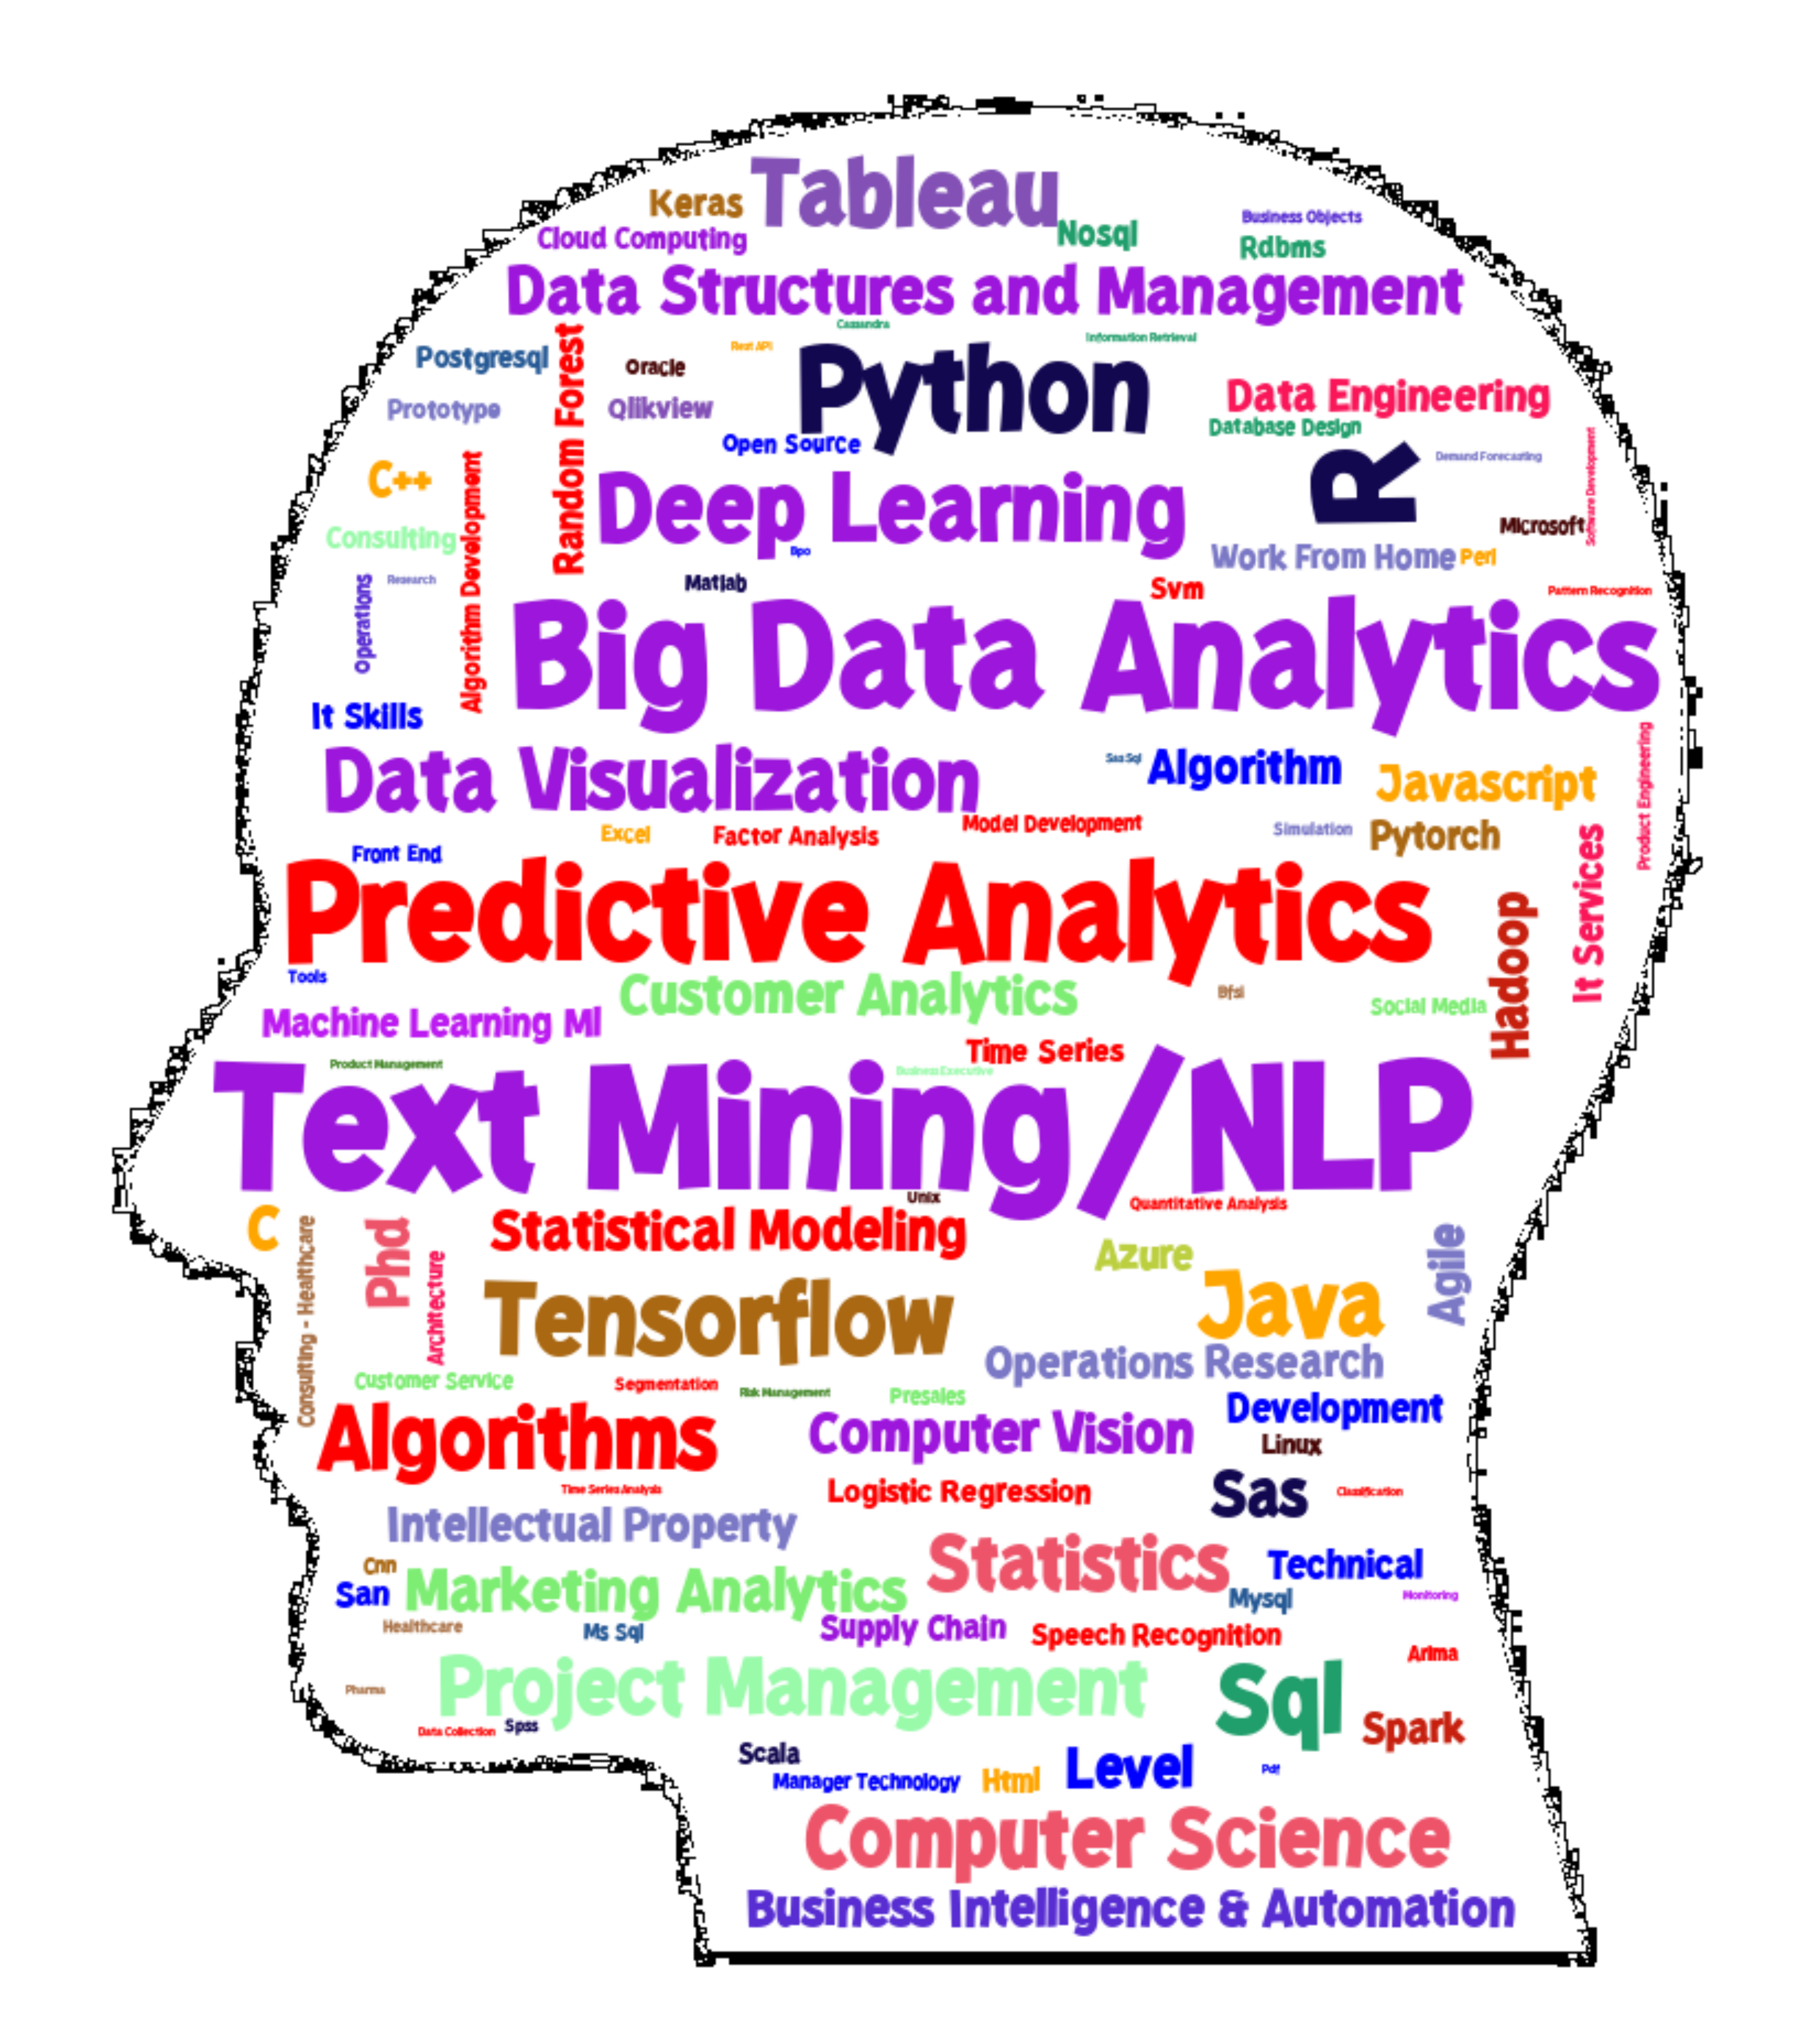

In [329]:

d = {}
for a, x in df7.values:
    d[a] = x

mask = np.array(Image.open('C:/Users/suvad/Downloads/man.jpg'))
stop_words = ["Data Science", "Machine Learning"]
    
wordcloud = WordCloud(stopwords=stop_words, font_path='C:/Users/suvad/Downloads/KurriIslandPERSONAL-Black.ttf', mask=mask, width=800, height=400, contour_width = 1, max_words=1000,
                      background_color="white", color_func=color_func).generate_from_frequencies(frequencies=d)
plt.figure(figsize=(20,10), dpi=500)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [294]:
df7.to_csv('C:/Users/suvad/Downloads/df7.csv')